In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]=""

import tensorflow as tf
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import glob
%matplotlib inline

## Load model

In [3]:
model = tf.keras.models.load_model("result/unet_mobilenet_128size_20epoch/best_checkpoint.h5")

## Random pick a pic

In [4]:
val_dir = os.path.join("data", "val_image", "class_0")
val_mask_dir = os.path.join("data", "val_mask", "class_0")

In [5]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [6]:
w, h =  128, 128

In [65]:
def show_ground_truth(ori_img, mask_img, truth_img):
    plt.figure(figsize=(20, 10))

    plt.subplot(131)
    plt.title("Original")
    plt.imshow(ori_img)
    plt.axis('off')

    plt.subplot(132)
    plt.title("Truth Mask")
    plt.imshow(mask_img.astype('float'))
    plt.axis('off')

    plt.subplot(133)
    plt.title("Truth Result")
    plt.imshow(truth_img)
    plt.axis('off')

    plt.show()

In [67]:
def show_prediction(ori_img, pred, res_img):
    plt.figure(figsize=(20, 10))

    plt.subplot(131)
    plt.title("Original")
    plt.imshow(ori_img)
    plt.axis('off')

    plt.subplot(132)
    plt.title("Prediction Mask")
    plt.imshow(pred)
    plt.axis('off')

    plt.subplot(133)
    plt.title("Prediction Result")
    plt.imshow(res_img)
    plt.axis('off')

    plt.show()

In [118]:
random_image_name = np.random.choice(glob.glob(os.path.join(val_dir, "*"))).split("/")[-1].replace(".jpg", "")
ori_img = cv2.imread(os.path.join(val_dir, random_image_name + ".jpg"))[:,:,::-1]
mask_img = cv2.imread(os.path.join(val_mask_dir, random_image_name + ".png"), cv2.IMREAD_GRAYSCALE)
truth_img = ori_img.copy()
truth_img[mask_img == 0] = 0 

input_img = ori_img.copy()
input_img = cv2.resize(input_img, (w, h)) / 255.
pred = model.predict(np.expand_dims(input_img, axis=0))
pred = np.array(create_mask(pred)).reshape(w, h).astype('float32')
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
# (thresh, binRed) = cv2.threshold(pred, 128, 255, cv2.THRESH_BINARY)
# pred = cv2.morphologyEx(pred, cv2.MORPH_OPEN, kernel, iterations=2)
kernel = np.ones((5,5),np.uint8)
pred = cv2.dilate(pred, kernel,iterations=2)
pred = cv2.erode(pred, kernel, iterations=3)
pred = cv2.resize(pred, ori_img.shape[:2][::-1])

res_img = ori_img.copy()
res_img[pred == 0] = 0 

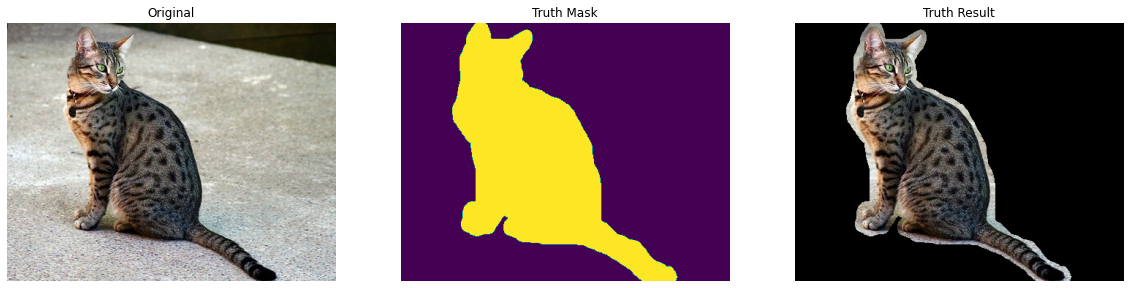

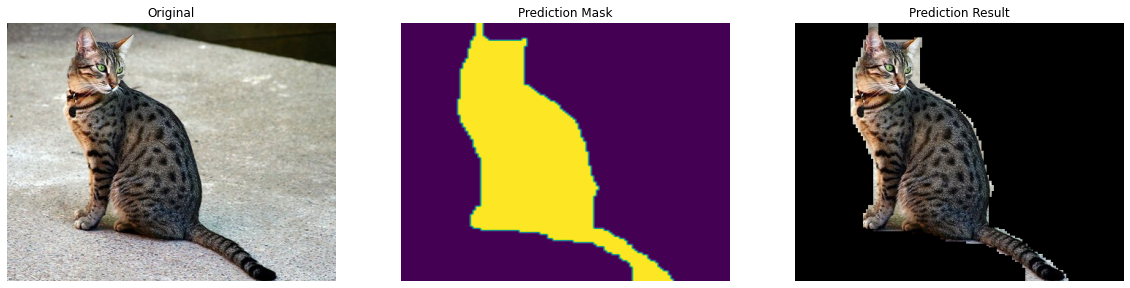

In [119]:
show_ground_truth(ori_img, mask_img, truth_img)
show_prediction(ori_img, pred, res_img)

In [113]:
random_image_name = np.random.choice(glob.glob(os.path.join('data/test_image/', "*")))

ori_img = cv2.imread(random_image_name)[:,:,::-1]
""
input_img = ori_img.copy()
input_img = cv2.resize(input_img, (w, h)) / 255.
pred = model.predict(np.expand_dims(input_img, axis=0))
pred = np.array(create_mask(pred)).reshape(w, h).astype('float32')
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
# (thresh, binRed) = cv2.threshold(pred, 128, 255, cv2.THRESH_BINARY)
# pred = cv2.morphologyEx(pred, cv2.MORPH_OPEN, kernel, iterations=2)
kernel = np.ones((5,5),np.uint8)
pred = cv2.dilate(pred, kernel,iterations=3)
pred = cv2.erode(pred, kernel, iterations=4)
pred = cv2.resize(pred, ori_img.shape[:2][::-1])

res_img = ori_img.copy()
res_img[pred == 0] = 0 

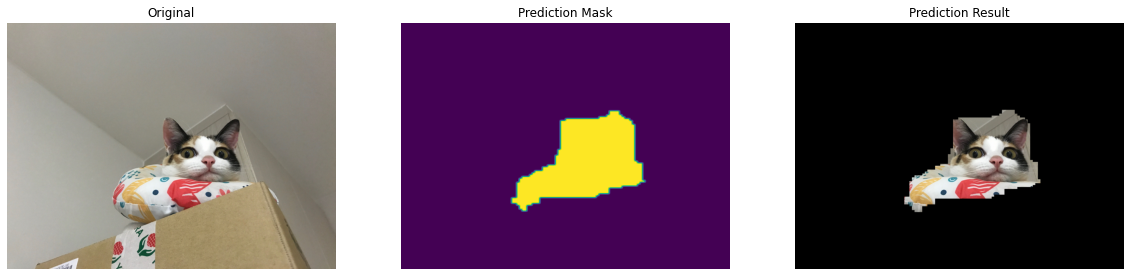

In [114]:
show_prediction(ori_img, pred, res_img)